**<h1><center>Customer Churn Prediction</center></h1>**

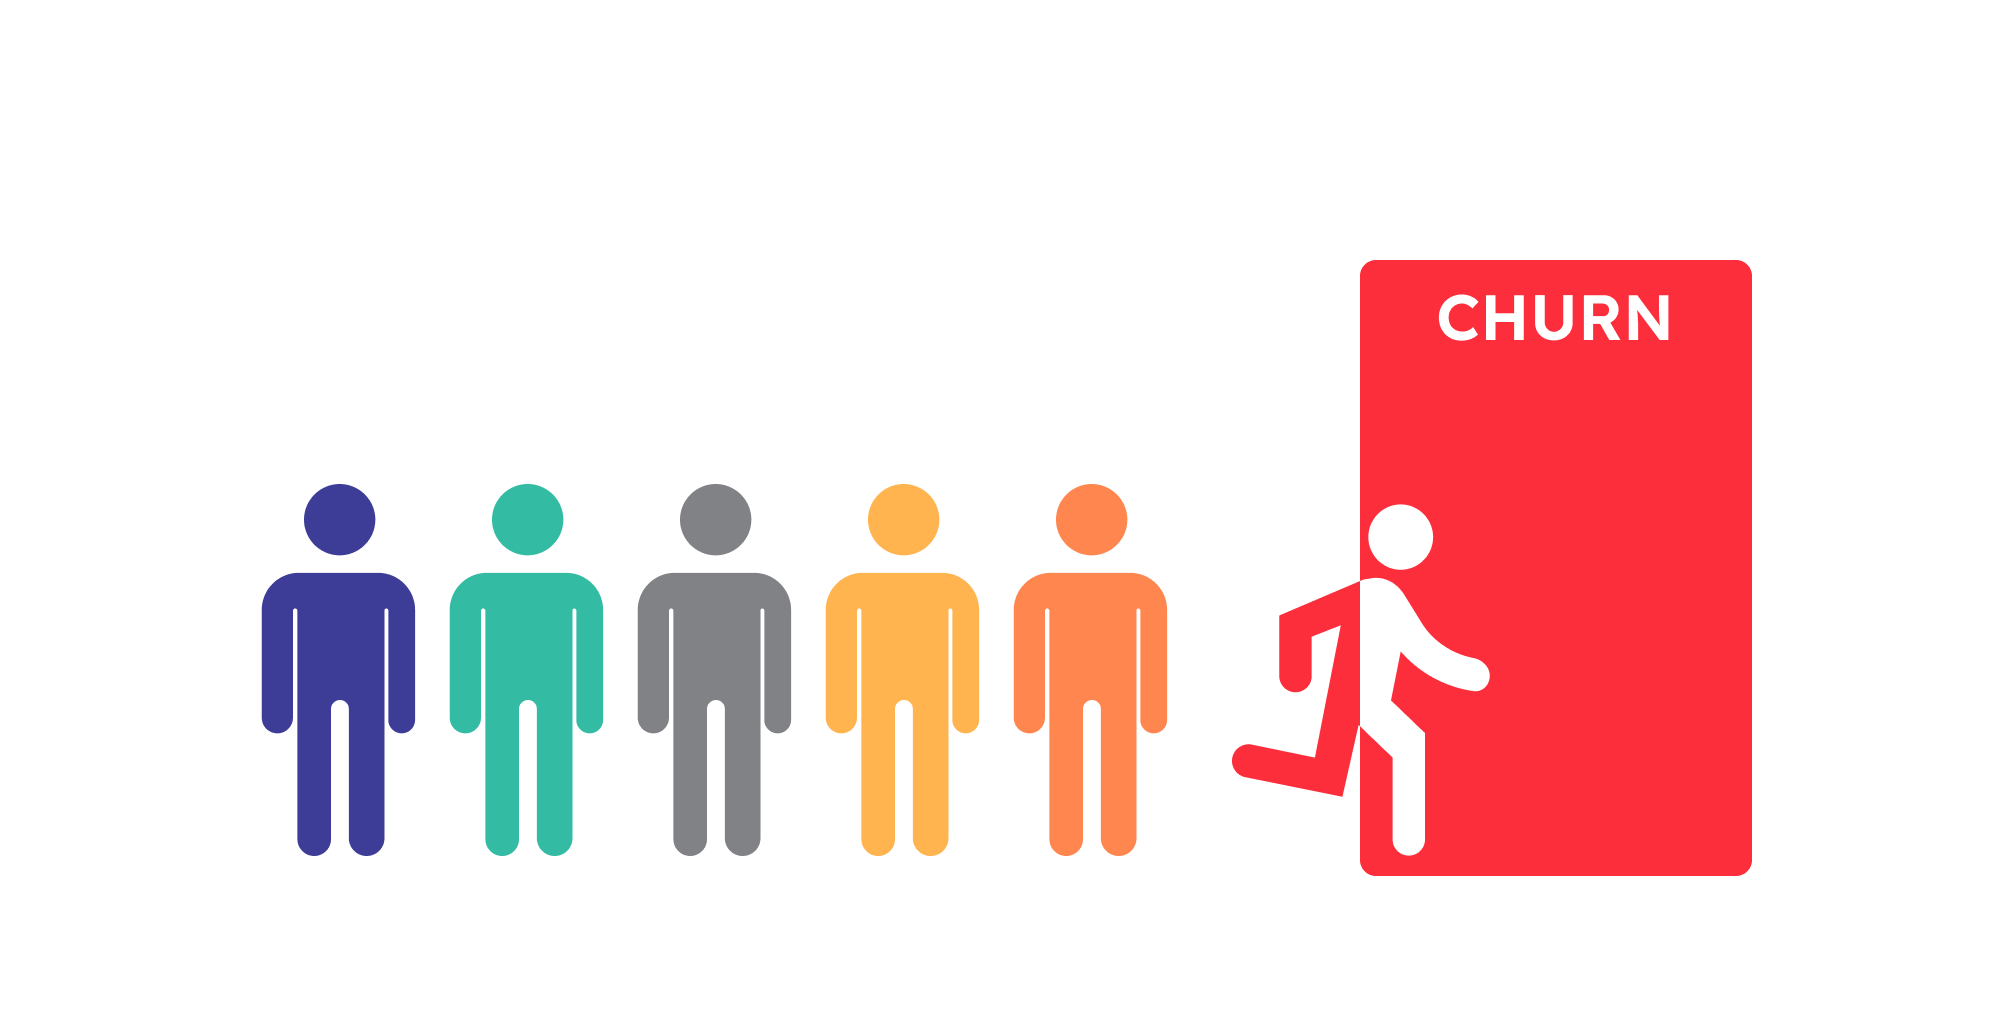

In [274]:

from IPython.display import Image,Markdown, display
image_path = "cover.png"
# Display the image
Image(filename=image_path)

### Table Of Content
* 1 Introduction
* 2 Libraries & Configuration
  * 2.1 Libraries
  * 2.2 Configuration
* 3 Data Validation and Cleaning
  * 3.1 Data Validation
  * 3.2 Data cleaning
* 4 EXploratory Data Analysis
  * 4.1 Target Variable
  * 4.2 Numerical Variable
      * 4.2.1 Relationship between Calories and protein
      * 4.2.2 Distribution bwteen numeric variable and Traffic
  * 4.3 Categorical Variables
* 5 Model fitting and Evaluation
  * 5.1 Data Pre-processing
  * 5.2 Logistic Regression
  * 5.3 Random Forest
  * 5.4 Model Evaluation
* 6 Insights
  * 6.1 Business Metrics
  * 6.2 Recommendation

  

# 1 Introduction

In today's data-driven world, businesses can enhance efficiency and profitability by leveraging their data to increase revenue and reduce customer churn. This notebook aims to conduct an in-depth analysis of data from a telecommunications company that provides home phone and internet services to 7,043 customers in California. Our goal is to uncover key insights into customer subscription behavior and churn.

### Problem Statement:
In an effort to improve operational efficiency and reduce customer attrition, the telecommunications company seeks to understand the factors influencing customer subscription behavior and churn. By analyzing data from 7,043 customers in California, this study aims to identify key patterns and insights that can inform strategies to increase revenue and minimize customer loss. The primary objective is to develop actionable recommendations that can enhance customer retention and optimize resource allocation.


### In this notebook, we aim to answer several Key Questions for Gaining Insights into Customer Behavior and Churning:

#### Demographic and Customer Information
1. **Demographic Impact on Churn:**
   - How do age and senior citizen status influence churn rates?
   - Does gender play a role in the likelihood of churn?
   - How does having a partner or dependents affect churn?

2. **Location-Based Analysis:**
   - Are there specific states, cities, or zip codes with higher churn rates?
   - How does the geographic location (latitude and longitude) correlate with churn?
   - Do customers in certain regions prefer different types of services (e.g., DSL vs. Fiber Optic)?

#### Service Subscription and Usage Patterns
1. **Service Subscription Trends:**
   - What is the churn rate among customers with different internet service types (DSL, Fiber Optic, Cable)?
   - How do additional services like online security, online backup, and device protection impact churn?
   - Are customers with multiple lines or phone services more or less likely to churn?

2. **Usage Patterns:**
   - How does the tenure (number of months with the company) relate to churn?
   - Do customers who use streaming services (TV and movies) have different churn rates?
   - How does the frequency of website visits correlate with churn?

#### Financial and Contractual Factors
1. **Contract and Billing Preferences:**
   - How do different contract types (Month-to-Month, One Year, Two Year) affect churn?
   - Are customers with paperless billing more or less likely to churn?
   - How do payment methods (Bank Withdrawal, Credit Card, Mailed Check) relate to churn?

2. **Financial Insights:**
   - What is the average monthly charge for customers who churn compared to those who stay?
   - How do total charges influence the likelihood of churn?
   - How does the Customer Lifetime Value (CLTV) correlate with churn rates?

#### Predictive and Behavioral Analysis
1. **Churn Score Analysis:**
   - How accurate is the churn score in predicting actual churn?
   - What are the characteristics of customers with high churn scores?
   - Can we identify patterns in the data that contribute to high churn scores?

2. **Churn Reasons and Patterns:**
   - What are the most common reasons cited by customers for churning?
   - Are there specific services or issues frequently mentioned in churn reasons?
   - Can we identify any trends or commonalities among customers who churn?

By answering these questions, we can develop a comprehensive understanding of customer behavior and the factors driving churn. This, in turn, can inform targeted strategies to enhance customer retention and optimize marketing efforts.

### Objective:
The primary goal of this project is to apply data science techniques to analyze data from the telecommunications company. Our aim is to uncover key patterns in customer behavior and identify factors influencing customer churn. This analysis will provide actionable insights to improve customer retention strategies and develop a predictive model that can accurately identify customers at risk of churning with at least an 80% success rate.

### Data Sources:

The data for this project will be sourced from the telco companies database and will include various attributes such as customer IDs, location,payement method and churn.


### GitHub Project Repository :
* [ShopSmart Data Analysis](https://github.com/SaliuA/telco_Customer_churn)

This project also serves as the project of the month for the Data Community Africa.
* [Data Community Africa](https://www.datacommunityafrica.org//)

### Summary :



# 2 Libraries & Configurations

### 2.1 Libraries
Loading the relevant libraries and user-defined functions

In [275]:
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
from scipy import stats     # for statistics
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from math import sqrt

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### 2.2 Configurations
Setting the configurations to be used for our analysis.

In [276]:
# seed value
SEED = 42
#set seaborn theme
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)


# 3. Data Wrangling
This data set has 7043 rows and 33 columns consisting of both numeric and categorical features.


In [277]:
#loading the dataframe
df= pd.read_excel('Telco_customer_churn.xlsx')
#viewing the dataframe
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [278]:
df.shape

(7043, 33)

### 3.1 Data Validation
The categorical features( country, state, Count) were removed for having zero variability while the redundant column (Lat long) was also removed. The Total charges column was converted from object type to numeric type

In [279]:
#cheking information on the all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [280]:
#checking statistical information about the numeric colunms
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [281]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    printmd(f'#### {col}:\n - {df[col].unique()}')

#### CustomerID:
 - ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']

#### Country:
 - ['United States']

#### State:
 - ['California']

#### City:
 - ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']

#### Lat Long:
 - ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']

#### Gender:
 - ['Male' 'Female']

#### Senior Citizen:
 - ['No' 'Yes']

#### Partner:
 - ['No' 'Yes']

#### Dependents:
 - ['No' 'Yes']

#### Phone Service:
 - ['Yes' 'No']

#### Multiple Lines:
 - ['No' 'Yes' 'No phone service']

#### Internet Service:
 - ['DSL' 'Fiber optic' 'No']

#### Online Security:
 - ['Yes' 'No' 'No internet service']

#### Online Backup:
 - ['Yes' 'No' 'No internet service']

#### Device Protection:
 - ['No' 'Yes' 'No internet service']

#### Tech Support:
 - ['No' 'Yes' 'No internet service']

#### Streaming TV:
 - ['No' 'Yes' 'No internet service']

#### Streaming Movies:
 - ['No' 'Yes' 'No internet service']

#### Contract:
 - ['Month-to-month' 'Two year' 'One year']

#### Paperless Billing:
 - ['Yes' 'No']

#### Payment Method:
 - ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

#### Total Charges:
 - [108.15 151.65 820.5 ... 7362.9 346.45 6844.5]

#### Churn Label:
 - ['Yes' 'No']

#### Churn Reason:
 - ['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased' nan]

In [282]:
#dropping redundant columns and columns have only one value
df.drop(['Country','Count','State','Lat Long'],axis=1,inplace=True)
#converting the Total_charges column to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

### 3.1 Data Cleaning
The 'Total charges' column contains missing values if the customer had zero period of subsription, the missing values wwere replaced with 0.
The 'Churn reason' column contains missing values if the customer did no churn, the missing values were replaced with 'Active customer'.
Every other column had zero missing values.

In [283]:
#checking for missing data
df.isnull().sum().reset_index()

,index,0
0,CustomerID,0
1,City,0
2,Zip Code,0
3,Latitude,0
4,Longitude,0
5,Gender,0
6,Senior Citizen,0
7,Partner,0
8,Dependents,0
9,Tenure Months,0


- Total Charges Column

In [284]:
#Exploring the pattern of the missing data
df[df['Total Charges'].isnull()].head()

,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,San Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,San Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN


In [285]:
#The missing total tenure values are for customers with zero tenure months, we will fill the missing values with 0
df['Total Charges'].fillna(0,inplace=True)

- Churn Reason

In [286]:
#Exploring the pattern of the missing data
df[df['Churn Reason'].isnull()]

,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1869,7590-VHVEG,Los Angeles,90001,33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,5575-GNVDE,Los Angeles,90002,33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,61,3441,NaN
1871,7795-CFOCW,Los Angeles,90004,34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1452-KIOVK,Los Angeles,90007,34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,43,4459,NaN
1873,6713-OKOMC,Los Angeles,90008,34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN
7039,6840-RESVB,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN
7040,2234-XADUH,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN
7041,4801-JZAZL,Angelus Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [287]:
#Filling the churn reason missing values with 'Active customer' clarifying that the customer did not churn
df['Churn Reason'].fillna('Active customer',inplace=True)

# 4.0 Exploratory Data Analysis


### 4.1 Target Variable- Churn Value

The variable 'Churn Value' is our target variable for predictive analysis, crucial for assessing the churn rate among customers. It quantifies the number of customers who have churned versus those who have remained.

  Churn Label  count
0          No   5174
1         Yes   1869


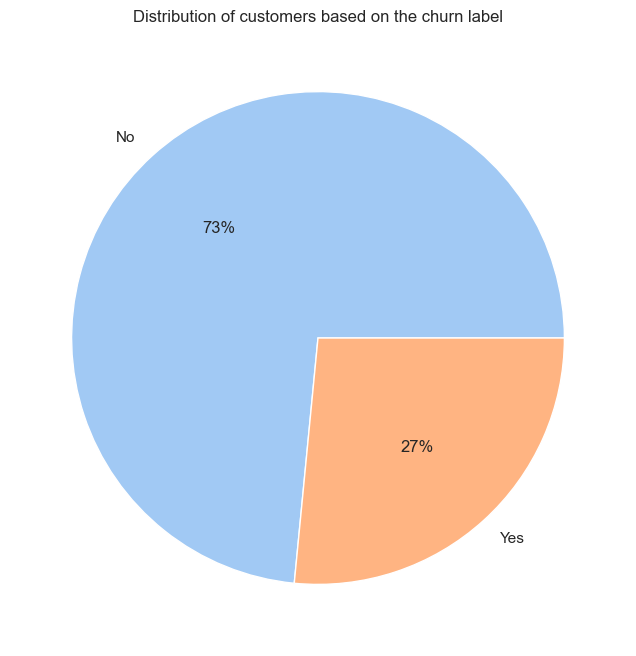

Pie chart showing the distirbution of customers based on churn label,figures indicate only 27% of customers churned

In [288]:
#checking the distribution of churned customers
df_churn=df["Churn Label"].value_counts().reset_index()
print(df_churn)
# Renaming columns for clarity
df_churn.columns = ['Churn', 'Frequency']
#checking the distribution of high and low customer traffic on the website with a pie chart
data = df_churn['Frequency']
labels = df_churn['Churn']
# Defining Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(labels)]
# Creating the  pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Distribution of customers based on the churn label')
plt.show()
printmd('Pie chart showing the distirbution of customers based on churn label,figures indicate only 27% of customers churned')

### 4.2 Features ( Categorical and Numerical features)


#### Demographic and Customer Analysis

- Age

Exploring the relationship between Age groups and churn

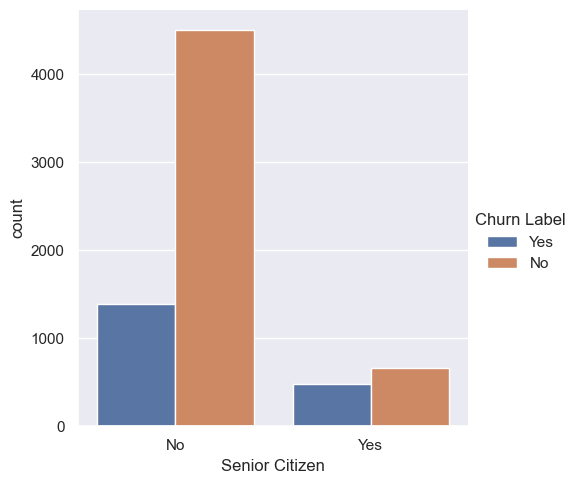

**While senior citizens constitute a smaller proportion of the overall dataset, a higher percentage of them have churned.**

In [289]:
#exploring the relationships between age and churn.

sns.catplot(x='Senior Citizen',hue='Churn Label',data=df, kind="count")
plt.show()

printmd("**While senior citizens constitute a smaller proportion of the overall dataset, a higher percentage of them have churned.**")

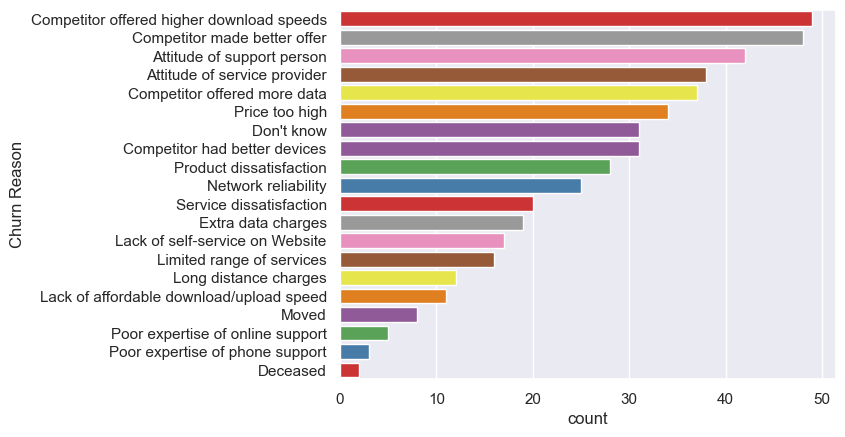

The presence of competitors plays a significant role in the high churn rate observed among senior citizens.

In [290]:
#Exploring the reason for high churn rate amongst senior citizens
df_senior= df[(df['Senior Citizen']=='Yes')&(df['Churn Label']=='Yes') ]
df_senior=df_senior['Churn Reason'].value_counts().reset_index()
sns.barplot(df_senior,y='Churn Reason',x='count',hue='count',legend=False,palette="Set1")
plt.show()
printmd('The presence of competitors plays a significant role in the high churn rate observed among senior citizens.')

- Gender
Exploring the relationship between churn and Gender.

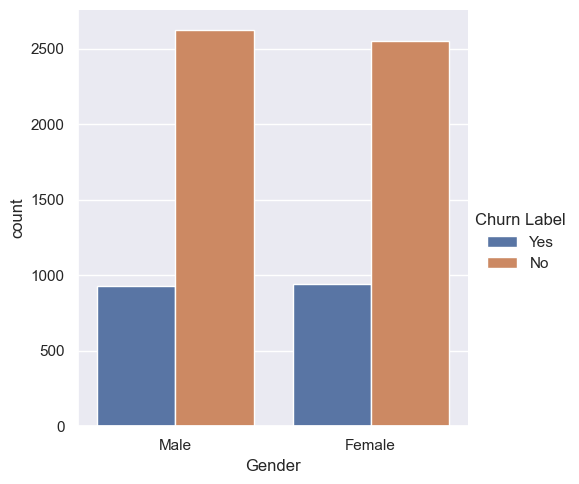

**The bar chart indicates that gender has no correlation with churn value**

In [291]:
#Exploring the relatioship between gender and churn
sns.catplot(x='Gender',hue='Churn Label',data=df, kind="count")
plt.show()
printmd(f"**The bar chart indicates that gender has no correlation with churn value**")

- Partner/Dependants
Exploring the relationships between Partner/Dependants and churn

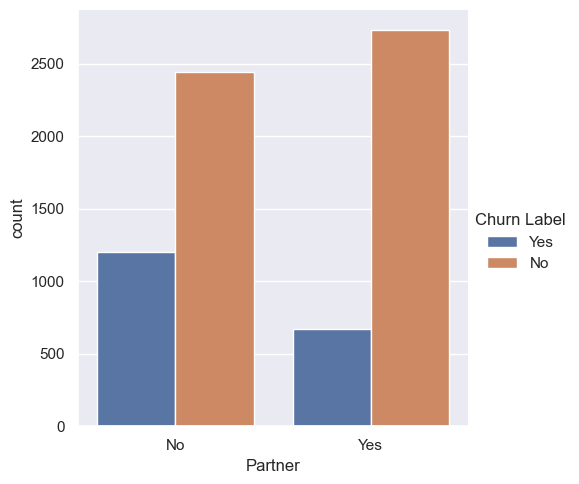

**The bar chart shows that individuals without partners have a higher churn value compared to those with partners.**

In [292]:
#Exploring the relatioship between partner and churn
sns.catplot(x='Partner',hue='Churn Label',data=df, kind="count")
plt.show()
printmd("**The bar chart shows that individuals without partners have a higher churn value compared to those with partners.**")

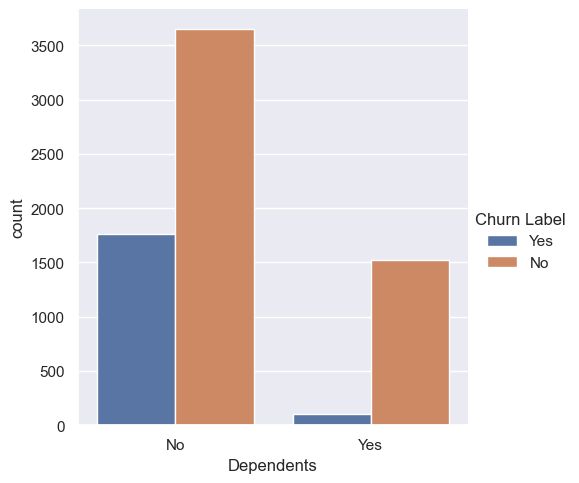

**The bar chart shows that individuals without dependants have a higher churn value compared to those with dependants.**

In [293]:
#Exploring the relatioship between dependents and churn
sns.catplot(x='Dependents',hue='Churn Label',data=df, kind="count")
plt.show()
printmd("**The bar chart shows that individuals without dependants have a higher churn value compared to those with dependants.**")

#### Location Analysis

- City

Exploring the relationship between churn and location

In [294]:
df_churned= df[df['Churn Label']=='Yes']
df_city= df_churned['City'].value_counts().reset_index()
df_city.rename(columns={'count': 'Churn_count'}, inplace=True)
#top 10 churn locations
df_city.head(10)



,City,Churn_count
0,Los Angeles,90
1,San Diego,50
2,San Francisco,31
3,San Jose,29
4,Sacramento,26
5,Fresno,16
6,Long Beach,15
7,Oakland,13
8,Glendale,13
9,Modesto,12


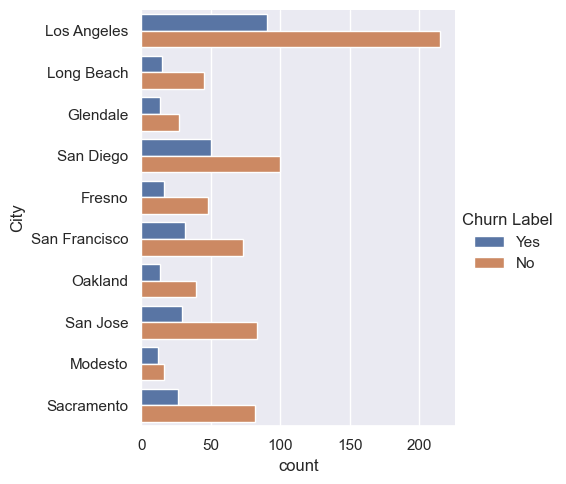

**“Los Angeles not only has the highest subscriber population, but also records the highest churn value.”**

In [295]:
# Select the top 10 cities with the highest churn count
city_top = df_city['City'][:10].values

# Filter the dataframe to include only the top 10 cities
city_top = df[df['City'].isin(city_top)]

# Create a count plot using seaborn
sns.catplot(y='City', hue='Churn Label', data=city_top, kind='count')

# Display the plot
plt.show()

# Print a markdown message with the explanation
printmd("**“Los Angeles not only has the highest subscriber population, but also records the highest churn value.”**")


- Churn Reason among Locations

Exploring the reason for churning in the top ten locations

In [296]:

# Group by 'City' and 'Reason for Churning', count the number of churns for each reason
churn_reasons = city_top[city_top['Churn Label'] == 'Yes'].groupby(['City', 'Churn Reason']).size()

# Reset the index of the DataFrame and rename the size column to 'Count'
churn_reasons = churn_reasons.reset_index(name='Count')

# Sort the DataFrame by 'City' and 'Count' in descending order so that the top reason for each city comes first
churn_reasons = churn_reasons.sort_values(['City', 'Count'], ascending=[True, False])

# Drop duplicate cities, keeping only the first occurrence (which, due to the sorting, is the top reason)
top_churn_reasons = churn_reasons.drop_duplicates('City').sort_values(by='Count',ascending=False)

display(top_churn_reasons[['City','Churn Reason']])
printmd("The trend of churning in major cities being driven by competition from other telecommunications firms, is also observed among senior citizens")


,City,Churn Reason
29,Los Angeles,Competitor offered higher download speeds
85,San Diego,Product dissatisfaction
63,Sacramento,Competitor offered more data
89,San Francisco,Competitor offered higher download speeds
0,Fresno,Attitude of service provider
10,Glendale,Attitude of support person
43,Modesto,Competitor offered higher download speeds
101,San Jose,Competitor offered higher download speeds
17,Long Beach,Attitude of support person
51,Oakland,Competitor had better devices


The trend of churning in major cities being driven by competition from other telecommunications firms, is also observed among senior citizens

### Service Subscription and Usage Patterns
Exploring the relationship between Subscription type, usage pattern and Churning

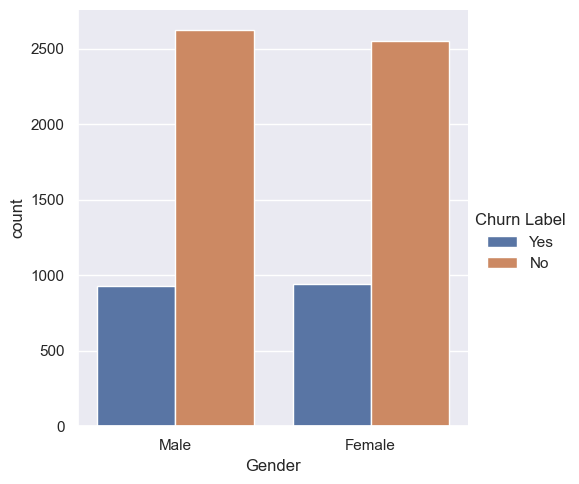

**The bar chart indicates that gender has no correlation with churn value**

In [297]:
#Exploring the relatioship between gender and churn
sns.catplot(x='Gender',hue='Churn Label',data=df, kind="count")
plt.show()
printmd(f"**The bar chart indicates that gender has no correlation with churn value**")

### 4.2 Numeric Variables 




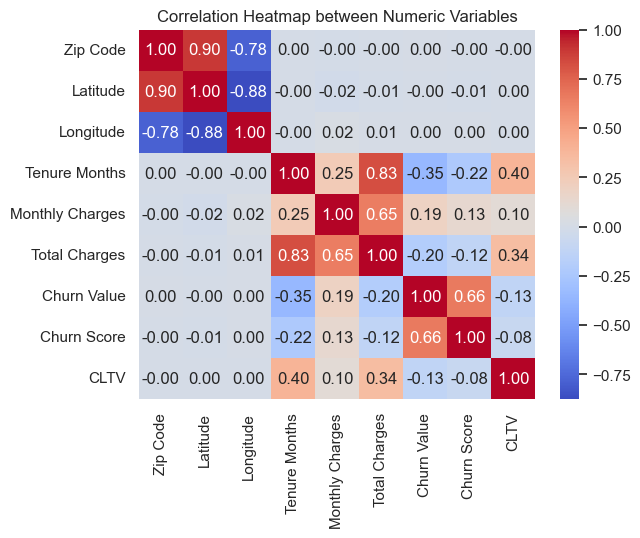

In [298]:

# Select numeric columns
numeric = df.select_dtypes(include=['float', 'int']).columns

# Create a correlation matrix for the numeric columns
correlation_matrix = df[numeric].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Numeric Variables')
plt.show()

#### 4.2.1 Relationship Between Calories and Protein  

The scatter plot illustrates the relationship between protein intake (in grams) and calorie intake. Here’s what the scatter plot indicates:

- Protein Intake Range: From 0 to approximately 350 grams.

- Calorie Intake Range: From 0 to about 3500 calories.

There seems to be a positive trend, where higher protein intake is associated with higher calorie intake, although the relationship is not strictly linear.Most data points are clustered in the lower range for both protein and calorie intake, with fewer points at higher levels.

In [299]:
sns.scatterplot(y='calories',x='protein',data=df).set(title='Relationship bwtween Calories and Protein')
plt.show()

ValueError: Could not interpret value `protein` for `x`. An entry with this name does not appear in `data`.

#### 4.2.2 Distribution of Numeric variables by Traffic

The box plot suggests the following about the relationship between traffic and nutritional content:

- Servings: Higher traffic is associated with a wider range of servings, indicating variability in consumer preferences.

- Sugar: Slightly higher median for low traffic, with outliers on both ends, indicating no clear trend.

- Carbohydrates: Similar medians for both traffic groups, with a slightly wider range for low traffic.

- Protein: Higher median for high traffic, suggesting a positive relationship between protein content and traffic.

- Calories: Wide range for both high and low traffic, with several outliers, especially at lower calorie counts for high traffic, indicating variability.

Overall, protein content seems to have a positive correlation with higher traffic, while other nutrients show no clear trends based on these plots alone. The presence of outliers suggests that there are items that deviate significantly from the general pattern.

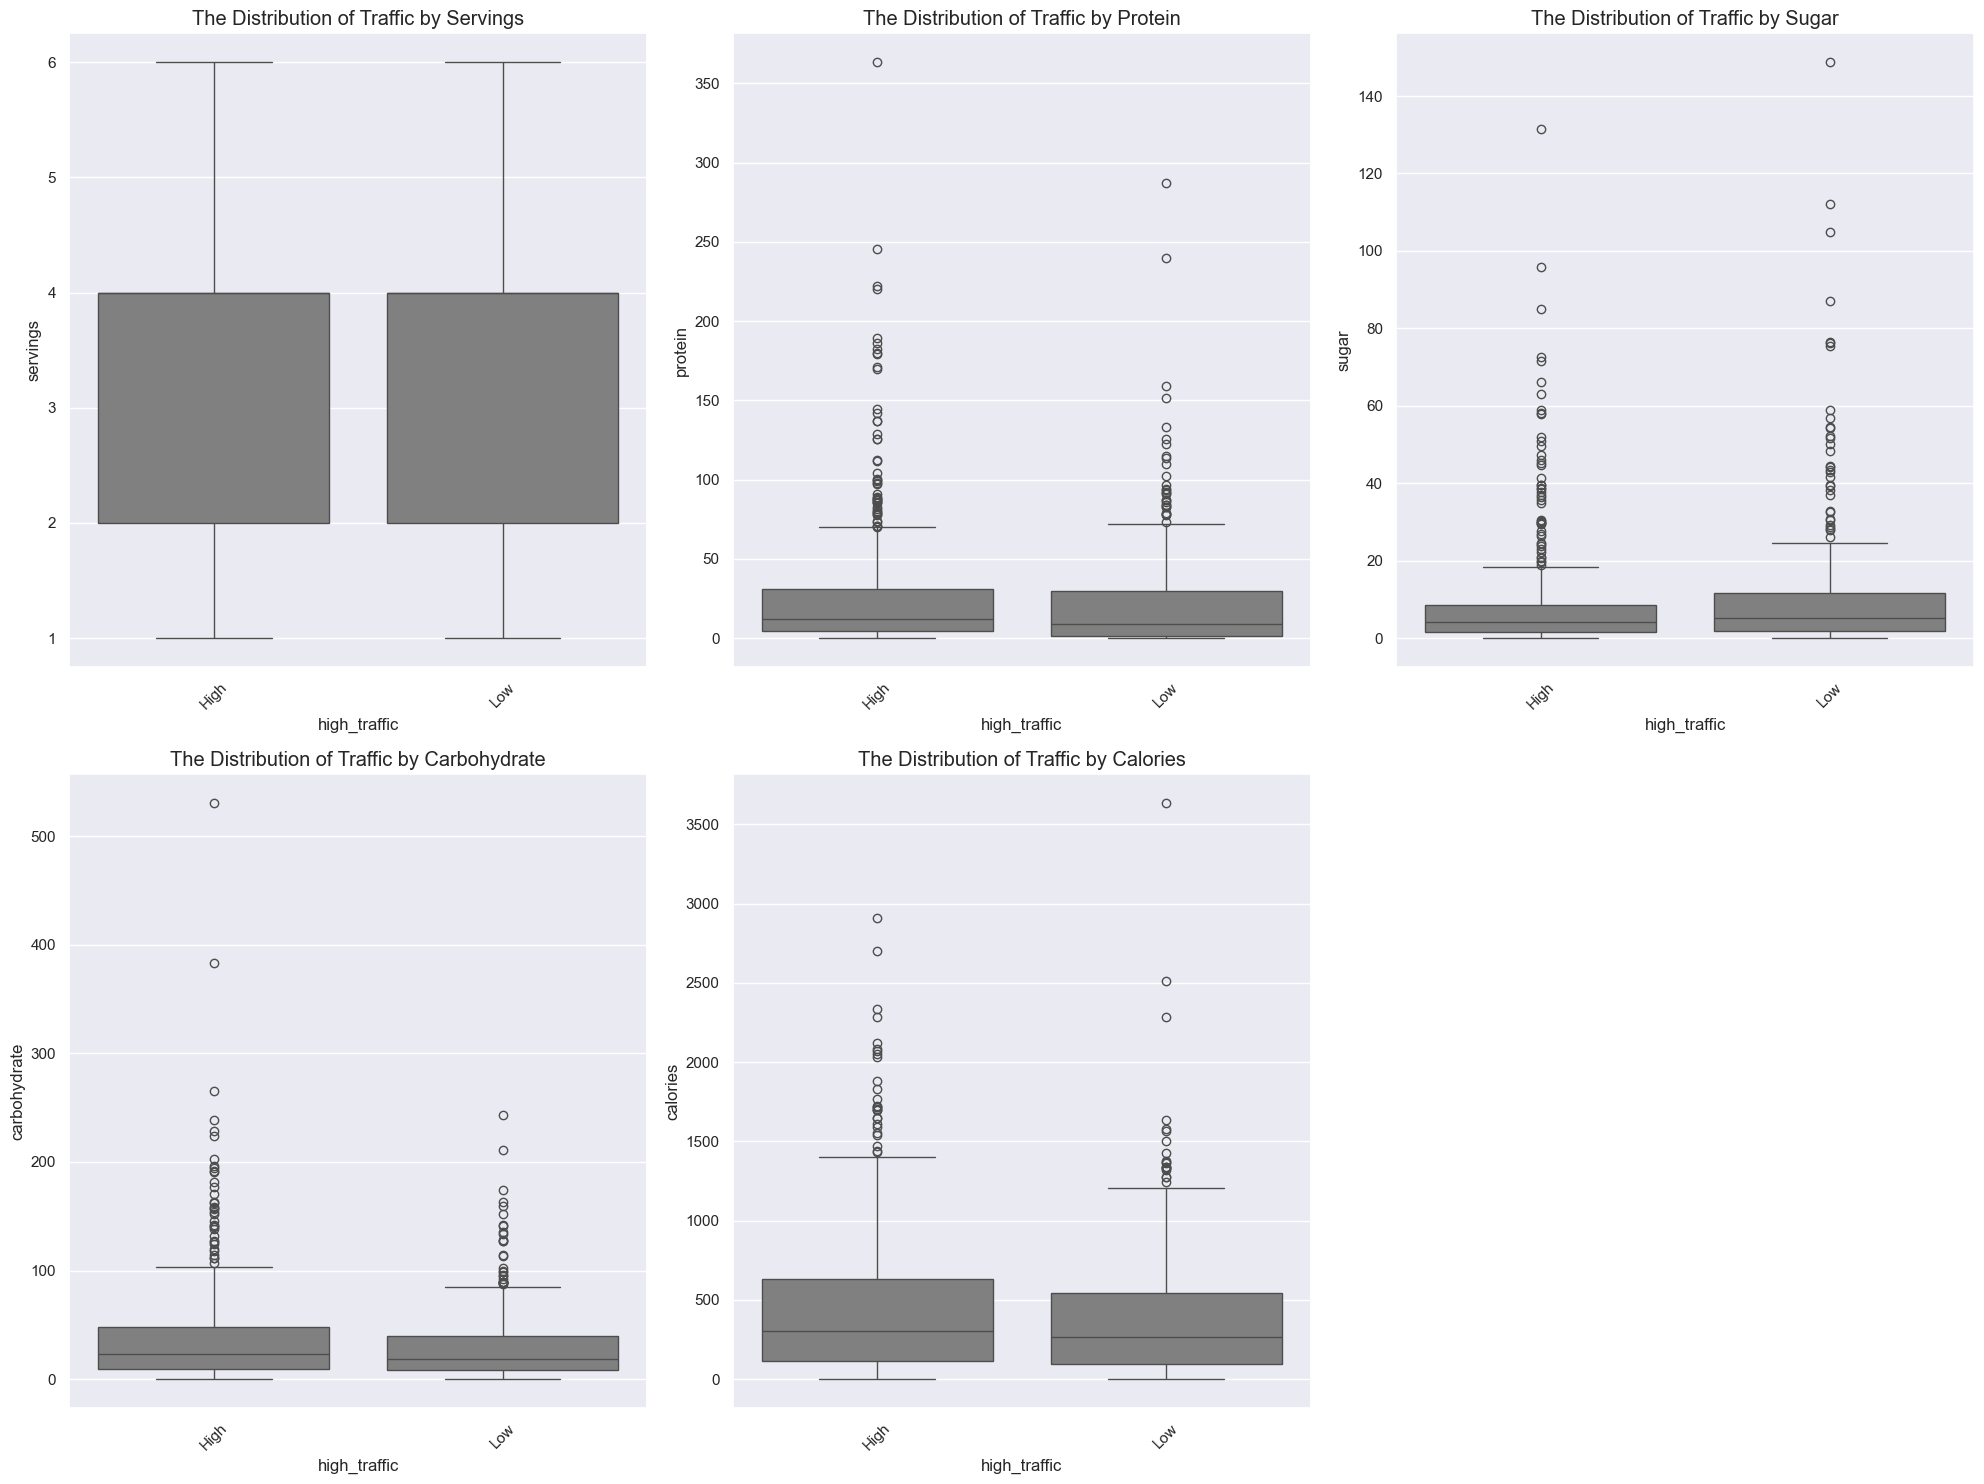

In [ ]:
nutritional_components = ['servings', 'protein', 'sugar', 'carbohydrate', 'calories']
titles = ['The Distribution of Traffic by Servings', 'The Distribution of Traffic by Protein',
          'The Distribution of Traffic by Sugar', 'The Distribution of Traffic by Carbohydrate',
          'The Distribution of Traffic by Calories']

fig, axes = plt.subplots(2, 3, figsize=(20, 15)) 

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Creating the boxplots
for i, (component, title) in enumerate(zip(nutritional_components, titles)):
    sns.boxplot(data=df, y=component, x='high_traffic', color='gray', ax=axes_flat[i])
    axes_flat[i].set_title(title, fontsize='large')  # Set the correct title
    axes_flat[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels to 45 degrees

# Remove the empty subplot (if any)
for i in range(len(nutritional_components), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()


### 4.3 Categorical Variables - category

The count plot of recipe types for various traffic groups indicates the following:

- High Traffic Preferences: potato recipes are the most popular, followed by vegetables and chicken. Beverages have the lowest count, suggesting they are less associated with high traffic.
- Low Traffic Preferences: Chicken leads but with a slightly higher count than in the high traffic group. Other categories like meat have lower counts compared to high traffic.

Overall Trends: The preference for chicken is consistent across both traffic groups, but other recipe types vary, reflecting different consumer interests or seasonal trends that could affect traffic with patato leading in the higher traffic count.


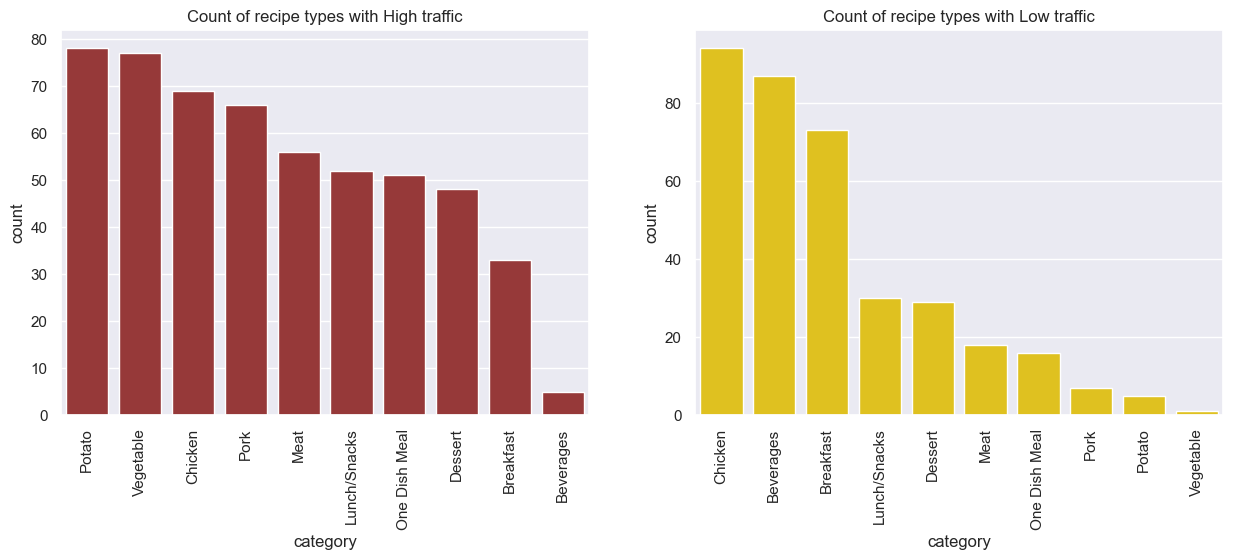

In [ ]:
#comparing recipe type with high and low traffic
fig, axes = plt.subplots(1,2,figsize=(15,5))
df_high= df[df["high_traffic"]=='High']
df_low= df[df["high_traffic"]=='Low']
sns.countplot(x=df_high['category'],ax=axes[0],color='brown',order=df_high['category'].value_counts(ascending=False).index).set(title='Count of recipe types with High traffic')
sns.countplot(x=df_low['category'],ax=axes[1],color='gold',order=df_low['category'].value_counts(ascending=False).index).set(title='Count of recipe types with Low traffic')
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
plt.show()

# 5.0 Model Fitting & Evaluation

Predicting web traffic is a classification problem that can be effectively addressed with logistic regression in machine learning. I have selected Logistic Regression as my foundational model. For comparison, I am employing the Random Forest classifier, which is adept at managing outliers and capturing complex, non-linear patterns.

For model evaluation, I am prioritizing the Precision metric because it reduces the occurrence of false positives, ensuring that when a recipe is forecasted to have high traffic, it is indeed highly probable.

### 5.1 Data Pre-Processing
For the modeling process, we’ve selected features such as calories, carbohydrates, sugar, protein, servings, and category, with High_traffic as the target variable. The following preprocessing steps have been implemented:

- The Target variable has been binarized into 1s and 0s.

- Categorical variables have been transformed into numerical features.

- Numerical features have been normalized.

- The dataset has been divided into training and test sets for model validation.

#### Target Column

In [ ]:
#mapping the target variable

df['high_traffic'] = df['high_traffic'].map({'High': 1, 'Low': 0}
)

#### Feature Columns

- One Hot encoding

In [ ]:
#applying one-hot encoding
df=pd.get_dummies(df,dtype=int,prefix='',prefix_sep='')

#### Train-Test Split

In [ ]:
#defining the Target and features
y= df['high_traffic'].values
X= df.drop('high_traffic',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=SEED)

#### Normalization

In [ ]:
#Normalization of the freatures using a StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

### 5.2 Logistic Regression Model
The baseline Logistic Regression Model, upon evaluation, achieved a precision score of 0.82 and a Receiver Operating Characteristic (ROC) - Area Under Curve (AUC) score of 0.84.

In [ ]:
#Expatiating the Logistic regression model
logreg=LogisticRegression()
#Training our model on the training set
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
# Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))
print("Log Loss: {:.2f}".format(log_loss(y_test, y_pred_proba)))



Confusion Matrix:
 [[ 80  28]
 [ 35 126]]
Accuracy: 0.77
Precision: 0.82
Recall: 0.78
F1 Score: 0.80
AUC: 0.84
Log Loss: 0.48


In [ ]:
# Extract the coefficients from the logistic regression model
coef = logreg.coef_

# Get the feature names after dropping the target column
col = df.drop("high_traffic", axis=1).columns

# Create a DataFrame to display the coefficients
# For binary classification, the index is usually a single element list
df_coef = pd.DataFrame(coef, index=['high_traffic'], columns=col)

# Display the DataFrame
df_coef


,calories,carbohydrate,sugar,protein,servings,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
high_traffic,0.05325,0.02972,-0.083374,0.043812,0.053029,-0.981299,-0.491236,-0.397499,-0.044768,-0.065308,0.108229,0.115617,0.4372,0.579131,0.942304


{'calories': -0.014297619844804788, 'carbohydrate': -0.001957662830528073, 'sugar': -0.00024104927330727, 'protein': -0.003948253784228517, 'servings': -0.009359292107687689, 'Beverages': 0.12601153182632033, 'Breakfast': 0.08102883342557662, 'Chicken': 0.06798204114495411, 'Dessert': 0.0007396437744485951, 'Lunch/Snacks': -0.0026333304131880954, 'Meat': 0.006938081292664633, 'One Dish Meal': 0.0020448905932777374, 'Pork': 0.013397435597750284, 'Potato': 0.03139617419151798, 'Vegetable': 0.030717474208182893}


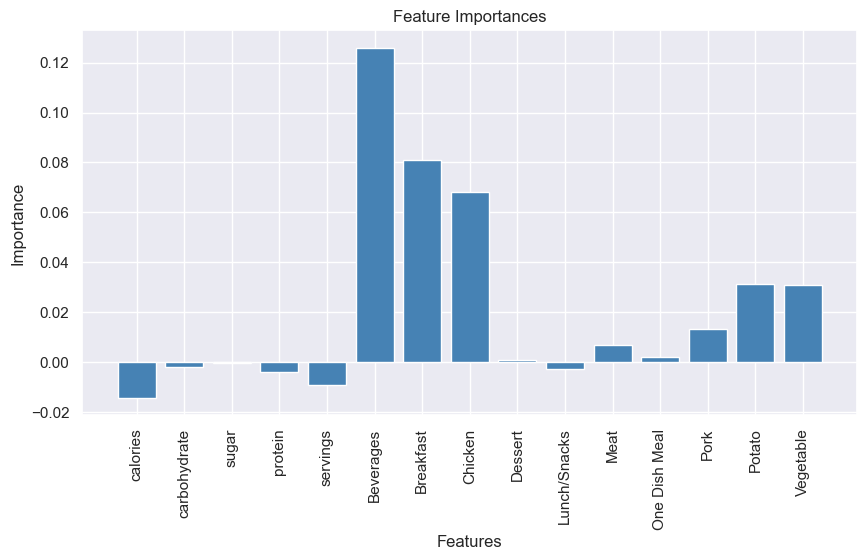

In [ ]:
#Checking our most important feature
result = permutation_importance(logreg, X_test_scaled, y_test,scoring='precision', n_repeats=10, random_state=42, n_jobs=2)

# Get importance
importances = result.importances_mean
# Print the feature importance
feature_importance = {feature: importance for feature, importance in zip(col, importances)}

# Now feature_importance is a dictionary where the key is the feature name and the value is the importance
print(feature_importance)
features = list(feature_importance.keys())
importances = list(feature_importance.values())
# Create the bar plot
plt.figure(figsize=(10, 5))  # Optional: You can set the figure size
plt.bar(features, importances, color='steelblue')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### 5.4 Random Forest Model
Upon evaluation with the precision metric, the Random Forest Model registered a score of 0.82 and achieved a Receiver Operating Characteristic (ROC) - Area Under Curve (AUC) score of 0.83

In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=55,max_depth=7,min_samples_leaf=1,random_state=SEED)
# Fit the model to your data
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=7, n_estimators=55, random_state=42)

Confusion Matrix:
 [[ 78  30]
 [ 28 133]]
Accuracy: 0.78
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
AUC: 0.83
Log Loss: 0.51


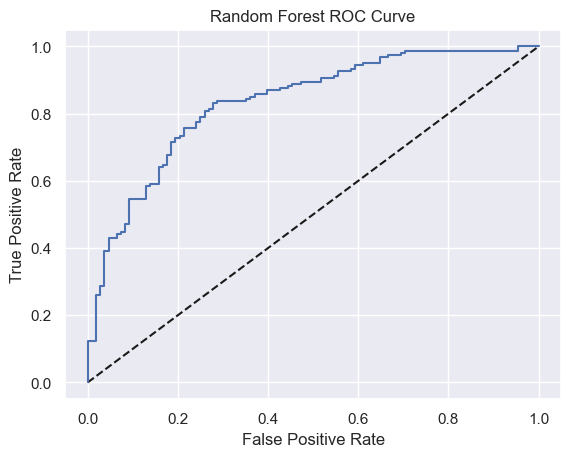

In [ ]:
# Predictions
y_pred = rf.predict(X_test_scaled)
y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))
print("Log Loss: {:.2f}".format(log_loss(y_test, y_pred_proba)))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

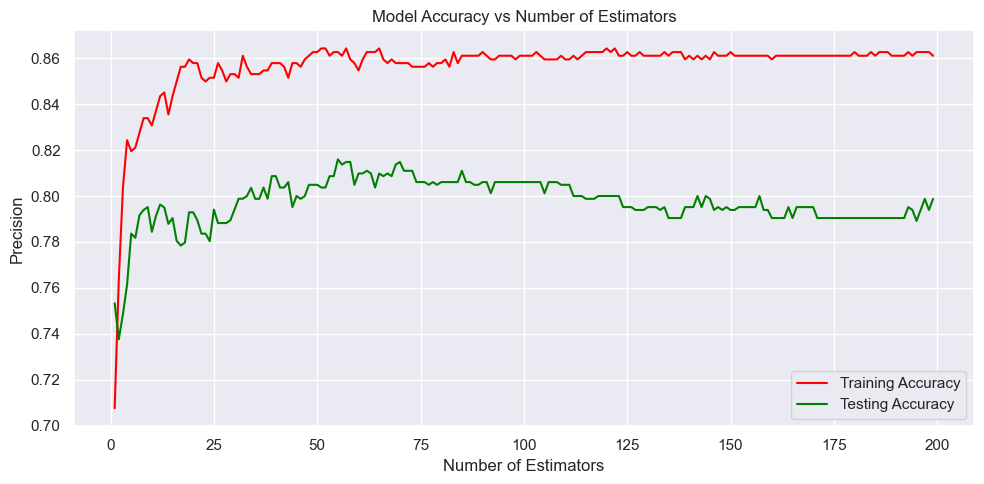

Best n_estimators: 55
Best max_depth: 7
Testing precision Score with best n_estimators and max_depth: 0.8


In [ ]:
# Initialize lists to store scores
train_scores = []
test_scores = []
max_accuracy = 0
best_n_estimators = 0
best_max_depth = 0

# Store best accuracies for plotting
best_train_scores = []
best_test_scores = []

# Loop over depths from 1 to 9
for j in range(1, 10):
    for i in range(1, 200):
        # Initialize and fit the RandomForestClassifier
        rf = RandomForestClassifier(n_estimators=i, max_depth=j, random_state=SEED)
        rf.fit(X_train_scaled, y_train)
        
        # Predict and calculate scores
        train_accuracy = rf.score(X_train_scaled, y_train)
        y_pred = rf.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, y_pred)
        
        # Append scores to lists
        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)
        
        # Update max accuracy and corresponding depth
        if test_accuracy > max_accuracy:
            max_accuracy = test_accuracy
            best_n_estimators = i
            best_max_depth = j

# Fix max_depth at the best found value, and vary n_estimators
for i in range(1, 200):
    rf = RandomForestClassifier(n_estimators=i, max_depth=best_max_depth, random_state=SEED)
    rf.fit(X_train_scaled, y_train)
    
    train_accuracy = rf.score(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    test_accuracy = precision_score(y_test, y_pred)
    
    best_train_scores.append(train_accuracy)
    best_test_scores.append(test_accuracy)

# Plotting the accuracy scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 200), best_train_scores, label='Training Accuracy', color='red')
plt.plot(range(1, 200), best_test_scores, label='Testing Accuracy', color='green')
plt.title('Model Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')
print(f'Testing precision Score with best n_estimators and max_depth: {round(max_accuracy,1)}')


### 5.5 Model Evaluation
The base Logistic Regression and Random Forest models both exhibit a Precision score of 0.82, demonstrating their effectiveness in predicting high-traffic recipes. The AUC-ROC scores are comparable, with the Logistic Regression model slightly outperforming the Random Forest model with scores of 0.84 to 0.83, respectively. This indicates that both models possess a good level of separability, which means they are adept at distinguishing between recipes that will have high or low web traffic, significantly surpassing the threshold of random chance.

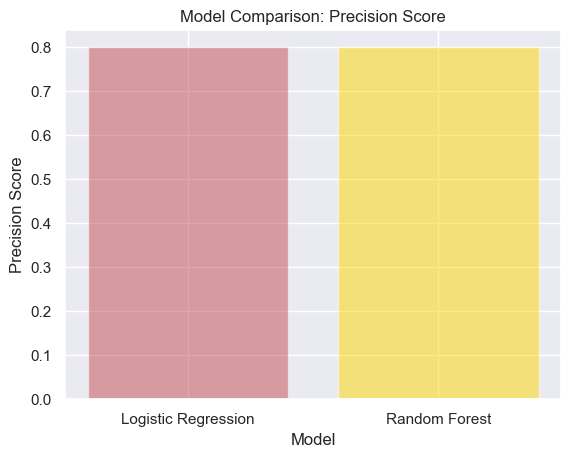

In [ ]:

# Calculate precision scores
precision_logreg = precision_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)

# Data for plotting
models = ['Logistic Regression', 'Random Forest']
precision_scores = [precision_logreg, precision_rf]

# Plotting
plt.bar(models, precision_scores, color=['r', 'gold'],alpha=0.5)

# Labels and titles
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Model Comparison: Precision Score')

plt.show()


# 6.0 Insights

#### 6.1 Business Metric

Tasty Bytes aims to predict which recipes will garner high traffic with at least 80% accuracy. The key business metric for monitoring this objective is the accuracy of predictions, with a special focus on the precision of forecasting high-traffic recipes, as it directly correlates with the success of content on the website.

- The business should consistently track the precision score of the model’s predictions to measure how frequently the high-traffic recipe predictions are correct.

- Considering that both the logistic model and random forest have precision scores of 0.82 and ROC AUC of 0.83, it’s advisable to set an initial precision target a bit lower, around 0.75-0.80, to allow for any potential overfitting or shifts in data trends once the model is operational.

- With ongoing data collection, Tasty Bytes can fine-tune this target based on real-world performance and evolving business requirements. Should the models regularly hit or surpass the set precision score, it would be prudent to increase the target to mirror advancements in model accuracy or shifts in business strategies.

#### 6.2 Recommendations

Summary: 

The logistic regression and random forest models have shown promising results, with precision scores of 0.82 and ROC AUC of 0.83, indicating they are capable of predicting high-traffic recipes with high accuracy. This aligns well with the business’s goal of achieving at least 80% accuracy in predictions.

Recommendations:

- Implement Monitoring: Set up a system to regularly evaluate the precision of the models’ predictions, focusing on high-traffic recipe predictions.

- Set Initial Metric Targets: Begin with an initial precision target of 0.75-0.80, which is slightly conservative compared to your current model performance, to ensure reliability in a production environment.

- Collect and Analyze Data: Continuously collect data on predicted vs actual traffic to recipes to further refine the models and adjust the precision target as needed.

- Consider Broader Metrics: Beyond precision, also monitor user engagement metrics like click-through and conversion rates to get a holistic view of performance.

- Iterate and Improve: Use new data to retrain and improve your models periodically, ensuring they adapt to changes in user preferences and content trends.

By following these recommendations, the business can effectively monitor and capitalize on high-traffic recipe predictions, driving better content strategy decisions.
